#  Sentiment Analysis via the ML-based approach


### Loading and Prep

Load, clean, and preprocess the data as you find necessary.

In [1]:
import pandas as pd
# TODO: import other libraries as necessary

df_train = pd.read_csv("sentiment_train.csv")

print(df_train.info())
print(df_train.head())

df_test = pd.read_csv("sentiment_test.csv")

print(df_test.info())
print(df_test.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
No

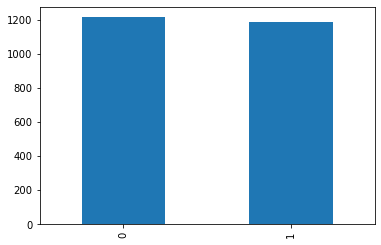

In [2]:
df_train['Polarity'].value_counts().plot.bar();

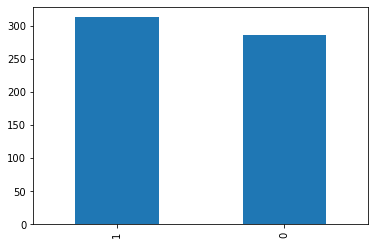

In [3]:
df_test['Polarity'].value_counts().plot.bar();

#### Label column summary:
The breakdown of positive and negative polarity is fairly even for both the trainning and testing data as shown above. Therefore, we have a fairly balanced label column.



#### Text Preprocessing
- REGEX
- Lower Case
- Tokenize
- Remove Stop Word
- Lemmatization

In [4]:
## divde up the data into x and y sets

X_train = df_train['Sentence']
y_train = df_train['Polarity']

X_test = df_test['Sentence']
y_test = df_test['Polarity']

print('Training Data :', X_train.shape)
print('Testing Data :', y_test.shape)

Training Data : (2400,)
Testing Data : (600,)


In [5]:
# import libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def text_processing(text):
    corpus = []
    for i in range(len(text)):
        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if word not in stopwords.words('english')]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        corpus.append(r)
    return corpus

# convert Sentense column into list
text_train = list(X_train)

# process the trainning data
corpus_train = text_processing(text_train)

In [6]:
## TF-IDF transformation

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(corpus_train)
X_train_array = X_train_tfidf.toarray()
X_train_cv = pd.DataFrame(X_train_array)
X_train_cv.columns = tfidf.get_feature_names()

X_train_cv.head()

,abhor,ability,able,abound,absolute,absolutel,absolutely,absolutley,abstruse,ac,...,yes,yet,young,youthful,yucky,yukon,yum,yummy,zero,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Modeling

Use your favorite ML algorithm to train a classification model.  Don’t forget everything that we’ve learned in our ML course: hyperparameter tuning, cross validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing classifier that you can.

In [7]:
#### logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

pipe = Pipeline([('classifier' , LogisticRegression())])

# grid searching parameter tuning
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

# perform 10 fold validation and griding searching with params above
clf = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, 
                     scoring='f1_macro', return_train_score=True, verbose=2)

clf = clf.fit(X_train_cv, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   26.4s finished


In [8]:
## Best model 

print(clf.best_score_)
print(clf.best_params_)

0.792976173027845
{'classifier': LogisticRegression(C=4.281332398719396, solver='liblinear'), 'classifier__C': 4.281332398719396, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


### Assessing

Use the testing data to measure the accuracy and F1-score of your model.  

In [9]:
## preprocess testing data set
text_test = list(X_test)
corpus_test = text_processing(text_test)

X_test_tfidf = tfidf.transform(corpus_test)
X_test_array = X_test_tfidf.toarray()
X_test_cv = pd.DataFrame(X_test_array)
X_test_cv.columns = tfidf.get_feature_names()

X_test_cv.head()

,abhor,ability,able,abound,absolute,absolutel,absolutely,absolutley,abstruse,ac,...,yes,yet,young,youthful,yucky,yukon,yum,yummy,zero,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       287
           1       0.86      0.68      0.76       313

    accuracy                           0.77       600
   macro avg       0.79      0.78      0.77       600
weighted avg       0.79      0.77      0.77       600



In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[252  35]
 [101 212]]
